# Movie Recommender System

Recommender Systems, also labelled as recommendation systems, are statistical algorithms that recommend products to users based on similarities between the buying trends of various user or similarities between the products.

Item-based collaborative filtering- In this products are recommended based on similarities between themselves. For instance if a user likes product A and product A has properties X and Y, another product B with properties X and Y will also be recommended to the user.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset contains 100,000 movie reviews applied to 9,000 movies by 600 users

In [15]:
movie_ids_titles=pd.read_csv("movies.csv")
movie_ids_titles.shape

(9742, 3)

In [16]:
movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movie_ids_ratings=pd.read_csv("ratings.csv")
movie_ids_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
movie_ids_ratings.shape

(100836, 4)

In [19]:
#Data Preprocessing- We need a dataframe that consists of userId, movieId, title and ratings

movie_ids_titles.drop(['genres'],inplace=True,axis=1)

movie_ids_titles.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [20]:
movie_ids_ratings.drop(["timestamp"],inplace=True,axis=1)

movie_ids_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [21]:
merged_movie_df= pd.merge(movie_ids_ratings, movie_ids_titles, on='movieId')

merged_movie_df.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [22]:
#Data Visualisation- Let's first group the dataset by title and see whhat information we can get regarding the ratings of movies.

merged_movie_df.groupby('title').describe()

userId                          \
                                           count        mean         std   
title                                                                      
'71 (2014)                                   1.0  610.000000         NaN   
'Hellboy': The Seeds of Creation (2004)      1.0  332.000000         NaN   
'Round Midnight (1986)                       2.0  354.500000   31.819805   
'Salem's Lot (2004)                          1.0  345.000000         NaN   
'Til There Was You (1997)                    2.0  229.000000  164.048773   
...                                          ...         ...         ...   
eXistenZ (1999)                             22.0  389.954545  167.161022   
xXx (2002)                                  24.0  272.916667  174.297576   
xXx: State of the Union (2005)               5.0  386.000000  148.801882   
¡Three Amigos! (1986)                       26.0  279.807692  193.794947   
À nous la liberté (Freedom for Us) (1931)    1.0  527.000000         NaN   

                                                                         \
                                             min     25%    50%     75%   
title                                                                     
'71 (2014)                                 610.0  610.00  610.0  610.00   
'Hellboy': The Seeds of Creation (2004)    332.0  332.00  332.0  332.00   
'Round Midnight (1986)                     332.0  343.25  354.5  365.75   
'Salem's Lot (2004)                        345.0  345.00  345.0  345.00   
'Til There Was You (1997)                  113.0  171.00  229.0  287.00   
...                                          ...     ...    ...     ...   
eXistenZ (1999)                             95.0  278.25  419.5  509.25   
xXx (2002)                                   9.0  131.25  240.5  418.50   
xXx: State of the Union (2005)             232.0  274.00  382.0  432.00   
¡Three Amigos! (1986)                        1.0  101.25  260.5  441.25   
À nous la liberté (Freedom for Us) (1931)  527.0  527.00  527.0  527.00   

                                                 movieId            ...  \
                                             max   count      mean  ...   
title                                                               ...   
'71 (2014)                                 610.0     1.0  117867.0  ...   
'Hellboy': The Seeds of Creation (2004)    332.0     1.0   97757.0  ...   
'Round Midnight (1986)                     377.0     2.0   26564.0  ...   
'Salem's Lot (2004)                        345.0     1.0   27751.0  ...   
'Til There Was You (1997)                  345.0     2.0     779.0  ...   
...                                          ...     ...       ...  ...   
eXistenZ (1999)                            608.0    22.0    2600.0  ...   
xXx (2002)                                 610.0    24.0    5507.0  ...   
xXx: State of the Union (2005)             610.0     5.0   33158.0  ...   
¡Three Amigos! (1986)                      599.0    26.0    2478.0  ...   
À nous la liberté (Freedom for Us) (1931)  527.0     1.0    5560.0  ...   

                                                              rating  \
                                                75%       max  count   
title                                                                  
'71 (2014)                                 117867.0  117867.0    1.0   
'Hellboy': The Seeds of Creation (2004)     97757.0   97757.0    1.0   
'Round Midnight (1986)                      26564.0   26564.0    2.0   
'Salem's Lot (2004)                         27751.0   27751.0    1.0   
'Til There Was You (1997)                     779.0     779.0    2.0   
...                                             ...       ...    ...   
eXistenZ (1999)                              2600.0    2600.0   22.0   
xXx (2002)                                   5507.0    5507.0   24.0   
xXx: State of the Union (2005)              33158.0   33158.0    5.0   
¡Three Amig

In [23]:
merged_movie_df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

In [24]:
#Sorting the movie titles in descending order of the average user ratings

merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [25]:
#Printing the movies in the descending order of their rating counts

merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

# A movie which is rated by large number of people is usually a good movie
Let's create a dataframe that shows the title, mean rating and the rating counts


In [26]:
movie_rating_mean_count= pd.DataFrame(columns=['rating_mean','rating_count'])

movie_rating_mean_count["rating_mean"]=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count["rating_count"]=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<AxesSubplot:>

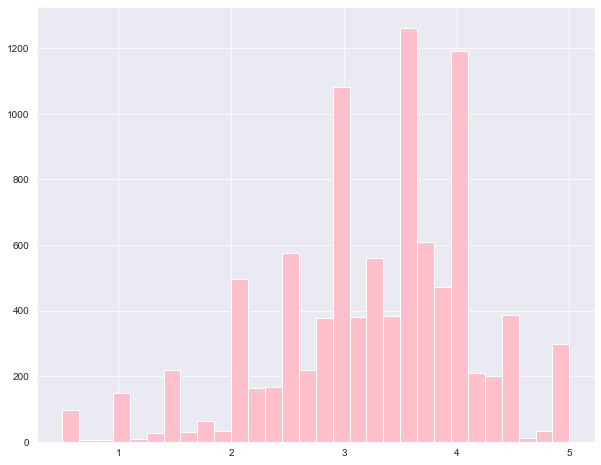

In [27]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count['rating_mean'].hist(bins=30, color='pink')

<AxesSubplot:>

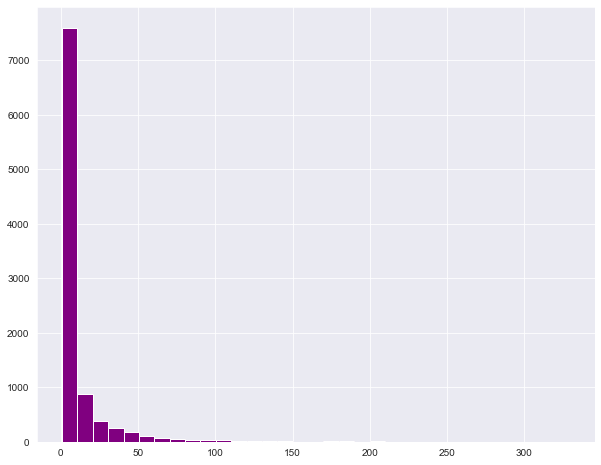

In [28]:
#Movies with rating 3 and 4----->above inference from plot

#Distibution of rating counts

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

movie_rating_mean_count["rating_count"].hist(bins=33, color="purple")


<AxesSubplot:xlabel='rating_mean', ylabel='rating_count'>

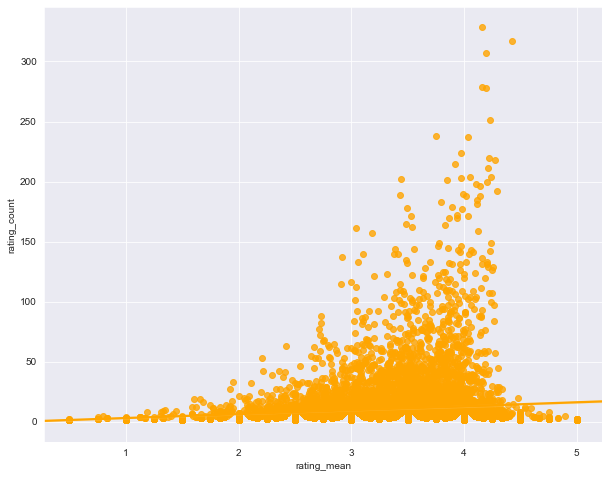

In [30]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")

sns.regplot(x="rating_mean",y="rating_count",data=movie_rating_mean_count, color="orange")

In [31]:
movie_rating_mean_count.sort_values("rating_count",ascending=False).head()

,rating_mean,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [32]:
user_movie_rating_matrix= merged_movie_df.pivot_table(index="userId",columns="title",values="rating")

user_movie_rating_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [33]:
user_movie_rating_matrix.shape

(610, 9719)

In [35]:
pulp_fiction_ratings= user_movie_rating_matrix["Pulp Fiction (1994)"]

In [47]:
import warnings

warnings.filterwarnings("ignore")

pulp_fiction_correlations=pd.DataFrame(user_movie_rating_matrix.corrwith(pulp_fiction_ratings),columns=["pf_corr"])

In [37]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head(5)

,pf_corr
title,
Underground (1995),1.0
"In-Laws, The (2003)",1.0
Eddie the Eagle (2016),1.0
"Wings of the Dove, The (1997)",1.0
After Life (Wandafuru raifu) (1998),1.0


In [38]:
pulp_fiction_correlations=pulp_fiction_correlations.join(movie_rating_mean_count["rating_count"])

pulp_fiction_correlations.head()

,pf_corr,rating_count
title,,
'71 (2014),NaN,1
'Hellboy': The Seeds of Creation (2004),NaN,1
'Round Midnight (1986),NaN,2
'Salem's Lot (2004),NaN,1
'Til There Was You (1997),NaN,2


In [39]:
pulp_fiction_correlations.dropna(inplace=True)

In [40]:
pulp_fiction_correlations.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Underground (1995),1.0,3
"In-Laws, The (2003)",1.0,3
Eddie the Eagle (2016),1.0,3
"Wings of the Dove, The (1997)",1.0,6
After Life (Wandafuru raifu) (1998),1.0,2


In [41]:
pulp_fiction_correlations_50=pulp_fiction_correlations[pulp_fiction_correlations['rating_count']>50]

pulp_fiction_correlations_50.sort_values("pf_corr",ascending=False).head()

,pf_corr,rating_count
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73
